In [1]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Weights
W = []

# Average error per epoch              
E = []          #The number of epochs is a hyperparameter that defines the number times that the learning algorithm will 
                #work through the entire training dataset.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))            #This is just the classic sigmoid function, given input x

In [4]:
def derivative_sigmoid(x):
    return x*(1-x)                  # The derivative of sigmoid is quite straight-forward

In [5]:
def Loss_Function(pred, y):
    if y == 1:                         # There are 2 possibilities for the ground-truth: either 0 or 1                      
      return -np.log(pred)               #np.log() is actually the natural logarithm with e, for its base
    else:
      return -np.log(1 - pred)


In [6]:
def derivative_Loss_Function(pred, y):
    #we account for 2 possibilities of y=0/1
    if y == 1:
      return -1/pred
    else:
      return 1 / (1 - pred)

In [1]:
def perceptron(X, Y, epoch):
    
    low = -0.01             # We consider a low and high range for our random weight generation.
    high = 0.01
    
    #using uniform distribution for our random weight generation.
    w2 = np.random.uniform(low=low, high=high, size=1)
    w1 = np.random.uniform(low=low, high=high, size=1)
    w0 = np.random.uniform(low=low, high=high, size=1)
    
    Epoch = epoch
    eta = 0.1  # The learning rate
        
    for i in range(Epoch):
        
        rand_index = np.arange(X.shape[0]) # Shuffle the train_data X and its Labels Y. 
        np.random.shuffle(rand_index)  # Now random_index has the same length as X and Y, and contains a shuffled index
                                       #list for X. 
        en = []  #en will record errors in an epoch. Then will be averaged, and this average value will be added to E.
                 #We reset en[], in the beginning of each epoch
        
        #This loop goes through the shuffled training data. rand_index makes sure for training data in X we are grabbing 
        #the correct ground truth from Y
        for i in rand_index:
            
            x = X[i]  # Grab the ith training data from X
            U = w1*x[0] + w2*x[1] + w0  # Compute U, which is the input to our sigmoidal unit
            pred = sigmoid(U)    # Apply sigmoid, to produce an output by the perceptron
            en.append(Loss_Function(pred, Y[i]))  # Compute the binary cross-entropy error for this ith data point and 
                                                  #add it to en[]
            
            # Compute the gradients of our error function w.r.t. all 3 learnable parameters (i.e., the weights of our
                                                                                               #network)
            dE_dw1 = derivative_Loss_Function(pred, Y[i])*derivative_sigmoid(pred)*x[0]
            dE_dw2 = derivative_Loss_Function(pred, Y[i])*derivative_sigmoid(pred)*x[1]
            dE_dw0 = derivative_Loss_Function(pred, Y[i])*derivative_sigmoid(pred)
            
            #Update the parameters using the computed gradients.
            w0 -= eta * dE_dw0
            w1 -= eta * dE_dw1
            w2 -= eta * dE_dw2
            
        E.append(np.mean(en))
        
    W.append(w0)
    W.append(w1)
    W.append(w2)

In [8]:
def plot_boundary(W, data, data_type):
    
    plt.figure()
    plt.title(data_type, fontsize=20)
            
    plt.scatter(data['x1'], data['x2'], c = data['y'])
    
    #Calculation the classification line
    x_1 = np.arange(-1, 8, 1)
    x_2 = (-W[1]/W[2]) * x_1 - (W[0]/W[2])
    
    plt.grid()
    plt.plot(x_1, x_2, '-k', marker='_', label="Decision Boundary")
    plt.xlabel('x1', fontsize=20)
    plt.ylabel('x2', fontsize=20)

In [9]:
def plot_error(E):
      
    plt.figure()
    plt.grid()
    plt.title("Error per Epoch", fontsize=20)
    plt.xlabel("Epochs During Training")
    plt.ylabel("Binary Cross-Entropy Error")
    plt.plot(E, c='r')
    plt.show()   

In [10]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\ML Lab\Dataset_1.csv", index_col = 0)
data = data[data['y'] != 3]
data.head()

,x1,x2,y
0,4.475986,1.610147,1
1,0.309710,2.789669,1
2,4.398344,3.946847,1
3,-0.660853,2.801566,1
4,4.044945,4.343379,1


In [11]:
train_data = data.sample(frac=0.8,random_state=200)   ##random state is a seed value
test_data = data.drop(train_data.index)

In [12]:
train_data_X = train_data[["x1", "x2"]].to_numpy()
train_data_y = train_data[["y"]].to_numpy()

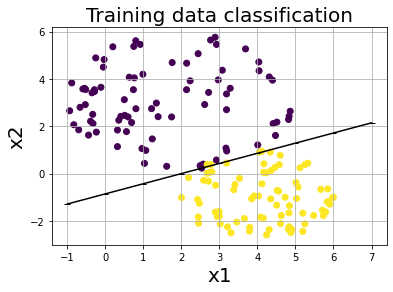

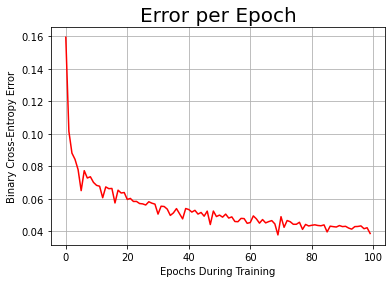

In [13]:
perceptron(train_data_X, train_data_y, 100)
plot_boundary(W, train_data, 'Training data classification')
plot_error(E)

In [14]:
test_data_X = test_data[["x1", "x2"]].to_numpy()
test_data_y = test_data[["y"]].to_numpy()

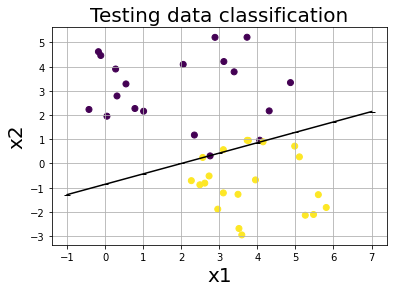

In [15]:
plot_boundary(W, test_data, 'Testing data classification')